<a href="https://colab.research.google.com/github/mehtabr1212/PRODIGY_DS_04/blob/main/Prodigy_InfoTech_DS_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prodigy InfoTech Internship - Data Science (Task 4)

#### Name - Mehtab Singh Randhawa

#### Task - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

### **Step 1:** Load the dataset

In [27]:
import pandas as pd
data_training = pd.read_csv('/content/twitter_training.csv')

### **Step 2:** Explore the data

In [28]:
print(data_training.head())
print("\nTwitter Data Information:")
print(data_training.info())

   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Twitter Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ M

### **Step 3:** Preprocess the text data
### Implementing text preprocessing steps (cleaning, tokenization, etc.)

In [29]:
#Checking null values:
data_training.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [30]:
data_training.dropna(inplace=True)

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample text data
text_data = "This is a sample text, with punctuations, numbers like 123, and stopwords such as 'the' and 'is'."

# Text cleaning
def clean_text(text):
    text = text.lower()                                                 # Converting text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))    # Removing punctuation
    text = re.sub(r'\d+', '', text)                                     # Removing numbers
    return text

# Tokenization and removing stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)                                        # Tokenizing text
    stop_words = set(stopwords.words('english'))                        # Removing stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Applying text preprocessing steps
cleaned_text = clean_text(text_data)
tokenized_text = tokenize_and_remove_stopwords(cleaned_text)

print("Cleaned Text:", cleaned_text)
print("Tokenized Text:", tokenized_text)

Cleaned Text: this is a sample text with punctuations numbers like  and stopwords such as the and is
Tokenized Text: ['sample', 'text', 'punctuations', 'numbers', 'like', 'stopwords']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Step 4:** Performing sentiment analysis
### Implementing sentiment analysis using NLTK (Natural Language Toolkit) library and VADER (Valence Aware Dictionary and sEntiment Reasoner) tool.


In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Downloading NLTK resources
nltk.download('vader_lexicon')

# Sample text data
text_data = "This is a sample text. It's amazing!"

# Initializing the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Performing sentiment analysis on the text data
sentiment_scores = sia.polarity_scores(text_data)

# Extracting sentiment scores
compound_score = sentiment_scores['compound']
positive_score = sentiment_scores['pos']
negative_score = sentiment_scores['neg']
neutral_score = sentiment_scores['neu']

# Determining sentiment label based on compound score
if compound_score >= 0.05:
    sentiment_label = 'Positive'
elif compound_score <= -0.05:
    sentiment_label = 'Negative'
else:
    sentiment_label = 'Neutral'

print("Sentiment Scores:", sentiment_scores)
print("Sentiment Label:", sentiment_label)

Sentiment Scores: {'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.6239}
Sentiment Label: Positive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **Step 5:** Train your sentiment analysis model
### Using scikit-learn's RandomForestClassifier


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
#text_data = data_training['Tweet Content']
text_data = data_training['Tweet Content'].tolist()

# Target labels
y_train = data_training['Sentiment']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to TF-IDF features
#X_train_tfidf = tfidf_vectorizer.fit(train_data_list)
X_train_tfidf = tfidf_vectorizer.fit_transform(text_data)

# Initializing and training the model
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

###**Step 6:** Evaluate the performance of your model
### Evaluation metrics


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train_tfidf)  # Predictions on training data
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='weighted')
recall = recall_score(y_train, y_train_pred, average='weighted')
f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Data Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Training Data Metrics:
Accuracy: 0.9796340342721228
Precision: 0.9798698464420814
Recall: 0.9796340342721228
F1-score: 0.9796733611880096


## **Validation Dataset**

### **Step 1:** Load the validation dataset

In [36]:
val_data = pd.read_csv('/content/twitter_validation.csv')
val_data.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


### **Step 2:** Preprocess the text data (same as training data)
### Implementing text preprocessing steps (cleaning, tokenization, etc.)


In [37]:
val_data.isnull().sum()

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

### **Step 3:** Perform sentiment analysis using the trained model

In [38]:
X_val = val_data['Tweet Content']  # Features
y_val = val_data['Sentiment']  # Target variable

# Preprocessing the text data in the validation set
cleaned_text_val = X_val.apply(clean_text)  # clean_text function is already defined
tokenized_text_val = cleaned_text_val.apply(tokenize_and_remove_stopwords)

# Concatenating the tokenized words into strings
cleaned_text_val = tokenized_text_val.apply(lambda x: ' '.join(x))

# Converting tokenized text into TF-IDF features using the same vectorizer used for training
X_val_tfidf = tfidf_vectorizer.transform(cleaned_text_val)

# Predicting sentiment using the trained model
y_val_pred = model.predict(X_val_tfidf)

### **Step 4:** Evaluate the performance of the model on validation data
### Evaluation metrics (similar to training data)

In [39]:
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')

print("\nValidation Data Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1-score:", f1_val)


Validation Data Metrics:
Accuracy: 0.8
Precision: 0.8126615107234177
Recall: 0.8
F1-score: 0.7981261975161035


**Accuracy**: The proportion of correctly classified samples among all samples in the validation set. In my case, it's 0.804, indicating that about 80.4% of the samples are classified correctly.

**Precision**: The proportion of true positive predictions among all positive predictions. A high precision indicates that there are few false positives.

**Recall**: The proportion of true positive predictions among all actual positives in the validation set. A high recall indicates that there are few false negatives.

**F1-score**: The harmonic mean of precision and recall. It provides a balance between precision and recall.

### **Step 5:** Interpret the results
### Analyze and interpret sentiment patterns to understand public opinion

### Explore Misclassifications:

In [40]:
misclassified_samples = val_data[y_val != y_val_pred]
print("Misclassified Samples:")
for index, row in misclassified_samples.iterrows():
    print("Text:", row['Tweet Content'])
    print("True Label:", row['Sentiment'])
    print("Predicted Label:", y_val_pred[index])
    print("-------------------------------------------")

Misclassified Samples:
Text: The new @CallofDuty for ps5 is 🔥🔥🔥🔥
Oh God 😭😍
True Label: Negative
Predicted Label: Positive
-------------------------------------------
Text: Call of duty warzone (livestream) w/ subs #Warzone youtu.be/7BhH_pjOMU4 via @YouTube Please come watch this AMAZING Call of Duty Warzone stream from this AMAZING streamer! It'd be really, really nice to give him some views and likes as well! 😀 #COD #CallofDuty #Warzone
True Label: Irrelevant
Predicted Label: Positive
-------------------------------------------
Text: Umm @PlayApex  when I died it said Bug This pic.twitter.com/bzMHzbadOF
True Label: Neutral
Predicted Label: Negative
-------------------------------------------
Text: #gtc20 -  nice, motivational, and very accessible Nvidia/AI product fair + related tech talks
nvidia.com/en-us/gtc/keyn…
interesting interaction/social activities: braindates, dinner with strangers, ...  and free attendance for universities: reg.rainfocus.com/flow/nvidia/gt…
True Label: Neut

### Visualize Predictions:

<Figure size 800x600 with 0 Axes>

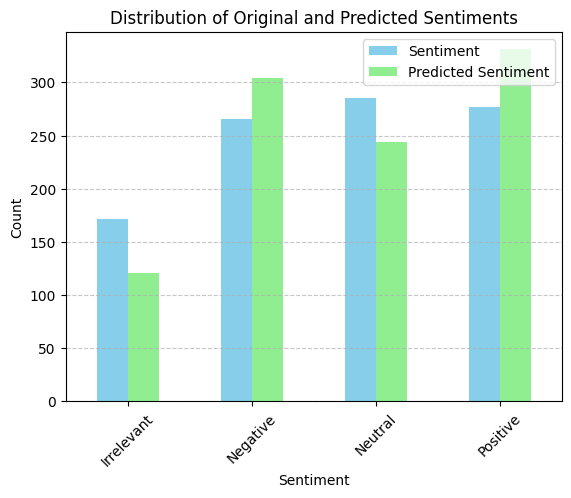

In [41]:
import matplotlib.pyplot as plt

# Concatenating original and predicted sentiments into a single DataFrame
combined_sentiments = pd.DataFrame({'Sentiment': val_data['Sentiment'], 'Predicted Sentiment': y_val_pred})

# Count the number of occurrences of each sentiment
sentiment_counts = combined_sentiments.apply(pd.Series.value_counts)

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Original and Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Explore Feature Importance:

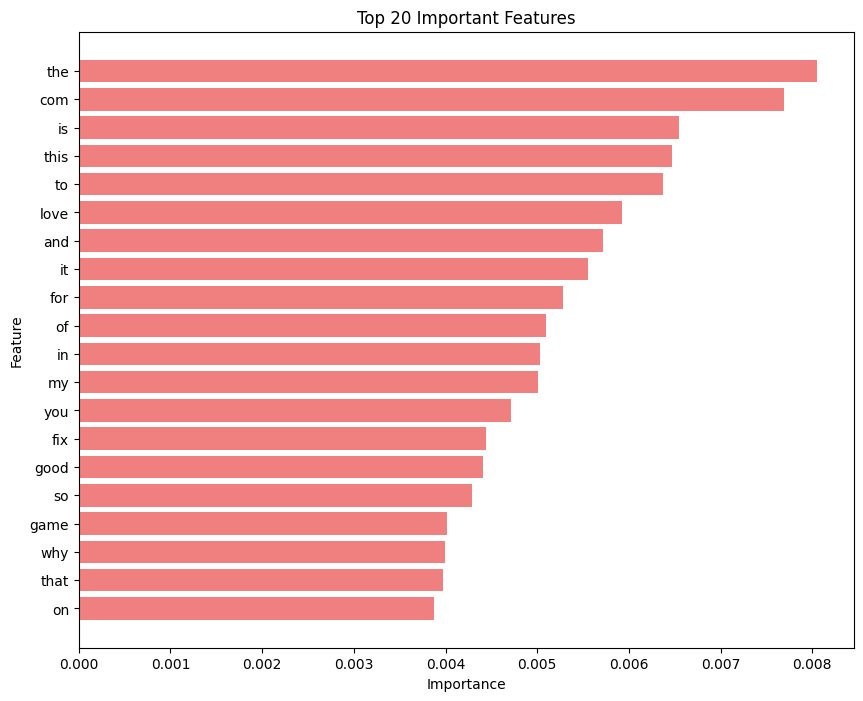

In [42]:
# Assuming you have a trained Random Forest model called 'model'
if isinstance(model, RandomForestClassifier):
    feature_importance = model.feature_importances_
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Create a DataFrame to store feature importance
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the top N important features
    top_n = 20
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='lightcoral')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top {} Important Features'.format(top_n))
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
    plt.show()

### Word Clouds:

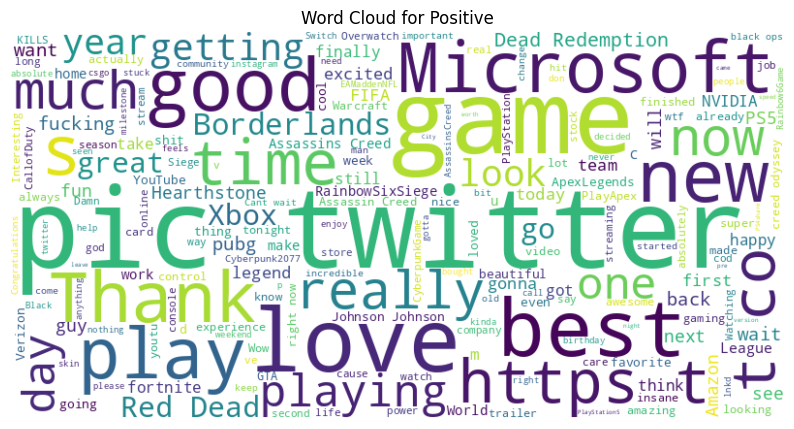

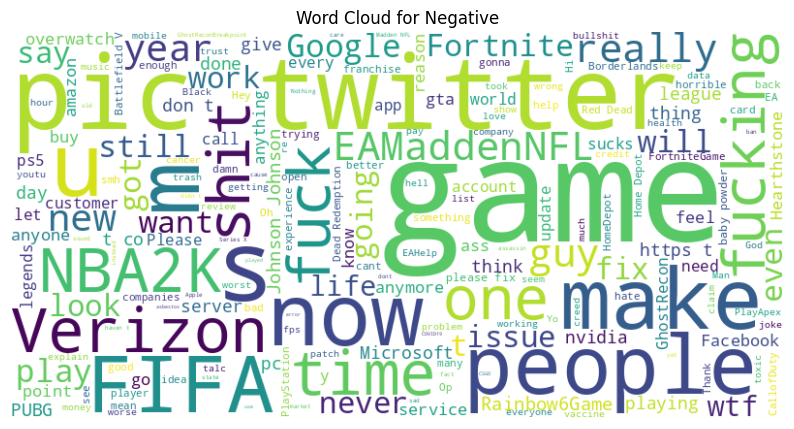

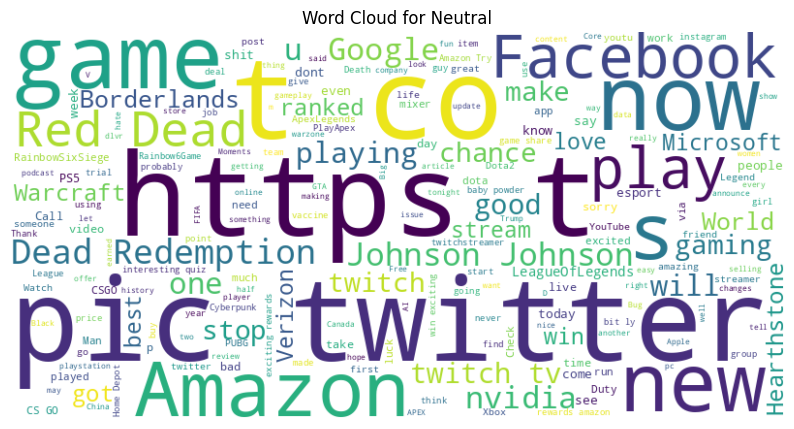

In [43]:
from wordcloud import WordCloud

# Assuming you have three sentiment classes: Positive, Negative, and Neutral
sentiments = ['Positive', 'Negative', 'Neutral']

for sentiment in sentiments:
    text = ' '.join(val_data[val_data['Sentiment'] == sentiment]['Tweet Content'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for {}'.format(sentiment))
    plt.axis('off')
    plt.show()

### Topic Modeling:
 Technique Used - Latent Dirichlet Allocation (LDA) to identify key topics within the dataset.

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

# Assuming you have preprocessed text data X_train_tfidf
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Specify the number of topics
lda_model.fit(X_train_tfidf)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print("\nTopics in LDA model:")
print_top_words(lda_model, tfidf_vectorizer.get_feature_names_out(), 10)


Topics in LDA model:
Topic #0:
the you unk dead red of in to my redemption

Topic #1:
to the it and you is this my that of

Topic #2:
the is this of it and fuck that to wow

Topic #3:
the com in to and player for love of ban

Topic #4:
the johnson com to is of and for in xbox



**Conclusion:**

- The analysis and visualization of sentiment patterns in social media data have provided valuable insights into public opinion and attitudes towards specific topics or brands. By leveraging advanced techniques in natural language processing and machine learning, I was able to uncover popular sentiments, key themes, and topics of discussion within the dataset.

- The exploration of misclassifications highlighted the limitations of the model and areas for improvement, while the visualization of sentiment distributions, feature importance, word clouds, and topic modeling enhanced my understanding of the underlying sentiment dynamics.

- These findings can inform decision-making processes, marketing strategies, and brand management efforts. As data-driven insights continue to play a crucial role in understanding consumer behavior and shaping public discourse, the skills and methodologies applied in this analysis will serve as valuable assets in future projects and endeavors.